Chemically Driven Persistence Images
====================================

When we consider representing a chemical molecule as a vectorized persistence image(PI), there is the possiblilty that two chemcial molecules can produce identical PIs. The molecules HBR and F<sub>2</sub> exhibit this quality. To remedy this issue, we compute the variance of the Gaussian kernel with the pairwise electronegativity differences of the atoms in the molecules. In the code blocks below, we will describe and show step by step the different functions located in the PersistentImages_Chemistry repository that produce a PI. We will produce examples without and with factoring in the pairwise electronegativity.

Produce PI without Electronegativity
------------------------------------

First we load the necessary classes and functions.

In [15]:
from Element_PI import PersImage, Makexyzdistance, VariancePersist
from ripser import Rips
from ripser import ripser
rips = Rips()
from sklearn.base import TransformerMixin
import numpy as np
import collections
from itertools import product
import collections
import pandas as pd
from scipy.stats import multivariate_normal as mvn
from scipy.stats import norm
import scipy.spatial as spatial
import matplotlib.pyplot as plt
from elements import ELEMENTS


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


Now we obtain the data files that contain the x,y, and z coordinates for the compounds we are concerned with. For our purposes, we will be using HBR and F<sub>2</sub>. 

In [3]:
compound_1 = 'babel/1.xyz'
compound_2 = 'babel/2.xyz'

At this point, we can produce a PI by using the VariancePersist function as outlined in the PI tutorial. However, we will further outline the functions that the VariancePersist function utilizes. First we will set our hyperparameters descriped in the PI Tutorial. 

In [7]:
pixelx, pixely = 100,100
myspread = .08
myspecs={"maxBD": 2, "minBD":0}


Now we generate a matrix that stores the distances from each atoms as well as the element names

In [8]:
D_1, element_1 = Makexyzdistance(compound_1)
D_2, element_2 = Makexyzdistance(compound_2)

Now we generate the Persistence Diagrams.

In [12]:
PD_1 = ripser(D_1,distance_matrix=True)
PD_2 = ripser(D_2,distance_matrix=True)

In [219]:
pointsh0_1 = (PD_1['dgms'][0][0:-1,1])
pointsh1_1 = (PD_1['dgms'][1])
diagram_1 = rips.fit_transform(D_1, distance_matrix=True)

pointsh0_2 = (PD_2['dgms'][0][0:-1,1])
pointsh1_2 = (PD_2['dgms'][1])
diagram_2 = rips.fit_transform(D_2, distance_matrix=True)


In [ ]:
'''eleneg_1=list()
for index in pointsh0_1:
    c = np.where(np.abs((index-PD_1['dperm2all'])) < .00000015)[0]

    eleneg_1.append(np.abs(ELEMENTS[element_1[c[0]]].eleneg - ELEMENTS[element_1[c[1]]].eleneg))


eleneg_2=list()
for index in pointsh0_2:
    c = np.where(np.abs((index-PD_2['dperm2all'])) < .00000015)[0]

    eleneg_2.append(np.abs(ELEMENTS[element_2[c[0]]].eleneg - ELEMENTS[element_2[c[1]]].eleneg))'''

In [ ]:
h0matrix_1 = np.hstack(((diagram_1[0][0:-1,:], np.reshape(((np.array(eleneg_1)+.4)/10 ), (np.size(eleneg_1),1)))))
buffer_1 = np.full((diagram_1[1][:,0].size,1), 0.05)
h1matrix_1 = np.hstack((diagram_1[1],buffer_1))

h0matrix_2 = np.hstack(((diagram_2[0][0:-1,:], np.reshape(((np.array(eleneg_1)+.4)/10 ), (np.size(eleneg_2),1)))))
buffer_2 = np.full((diagram_2[1][:,0].size,1), 0.05)
h1matrix_2 = np.hstack((diagram_2[1],buffer_2))

In [ ]:
Totalmatrix_1 = np.vstack((h0matrix_1,h1matrix_1))
pim_1 = PersImage(pixels=[pixelx,pixely], spread=myspread, specs=myspecs, verbose=False)
imgs_1 = pim.transform(Totalmatrix_1)

Totalmatrix_2 = np.vstack((h0matrix_2,h1matrix_2))
pim_2 = PersImage(pixels=[pixelx,pixely], spread=myspread, specs=myspecs, verbose=False)
imgs_2 = pim.transform(Totalmatrix_2)

In [ ]:
pim.show(imgs_1)
plt.show()

pim.show(imgs_2)
plt.show()

Produce PI with Electronegativity
---------------------------------

You will find that many of the steps are very similar to the example above. First, we load the necessary classes and packages.

In [16]:
from Element_PI import PersImage, Makexyzdistance, VariancePersist
from ripser import Rips
from ripser import ripser
rips = Rips()
from sklearn.base import TransformerMixin
import numpy as np
import collections
from itertools import product
import collections
import pandas as pd
from scipy.stats import multivariate_normal as mvn
from scipy.stats import norm
import scipy.spatial as spatial
import matplotlib.pyplot as plt
from elements import ELEMENTS

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


Next, we load the x, y, and z coordinates. 

In [209]:
compound_1 = 'babel/1.xyz'
compound_2 = 'babel/75.xyz'

We set hyperparameters.

In [210]:
pixelx, pixely = 25,25
myspread = .08
myspecs={"maxBD": 2, "minBD":0}

Now we generate the distance matrices.

In [211]:
D_1, element_1 = Makexyzdistance(compound_1)
D_2, element_2 = Makexyzdistance(compound_2)

We generate the data for the PDs.

In [212]:
PD_1 = ripser(D_1,distance_matrix=True)
PD_2 = ripser(D_2,distance_matrix=True)

This is where the algorithm diverts. We will now isolate the birth, death points for the connected components (h0) and holes (h1).

In [213]:
pointsh0_1 = (PD_1['dgms'][0][0:-1,1])
pointsh1_1 = (PD_1['dgms'][1])
diagram_1 = rips.fit_transform(D_1, distance_matrix=True)

pointsh0_2 = (PD_2['dgms'][0][0:-1,1])
pointsh1_2 = (PD_2['dgms'][1])
diagram_2 = rips.fit_transform(D_2, distance_matrix=True)

In [215]:
eleneg_1=list()
for index in pointsh0_1:
    c = np.where(np.abs((index-PD_1['dperm2all'])) < .00000015)[0]

    eleneg_1.append(np.abs(ELEMENTS[element_1[c[0]]].eleneg - ELEMENTS[element_1[c[1]]].eleneg))


eleneg_2=list()
for index in pointsh0_2:
    c = np.where(np.abs((index-PD_2['dperm2all'])) < .00000015)[0]

    eleneg_2.append(np.abs(ELEMENTS[element_2[c[0]]].eleneg - ELEMENTS[element_2[c[1]]].eleneg))

In [216]:
h0matrix_1 = np.hstack(((diagram_1[0][0:-1,:], np.reshape(((np.array(eleneg_1)+.4)/10 ), (np.size(eleneg_1),1)))))
buffer_1 = np.full((diagram_1[1][:,0].size,1), 0.05)
h1matrix_1 = np.hstack((diagram_1[1],buffer_1))

h0matrix_2 = np.hstack(((diagram_2[0][0:-1,:], np.reshape(((np.array(eleneg_1)+.4)/10 ), (np.size(eleneg_2),1)))))
buffer_2 = np.full((diagram_2[1][:,0].size,1), 0.05)
h1matrix_2 = np.hstack((diagram_2[1],buffer_2))

In [217]:
Totalmatrix_1 = np.vstack((h0matrix_1,h1matrix_1))
pim_1 = PersImage(pixels=[pixelx,pixely], spread=myspread, specs=myspecs, verbose=False)
imgs_1 = pim.transform(Totalmatrix_1)

Totalmatrix_2 = np.vstack((h0matrix_2,h1matrix_2))
pim_2 = PersImage(pixels=[pixelx,pixely], spread=myspread, specs=myspecs, verbose=False)
imgs_2 = pim.transform(Totalmatrix_2)

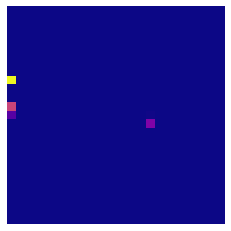

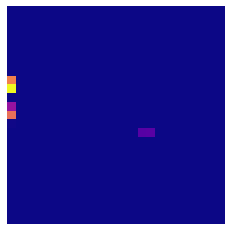

In [218]:
pim.show(imgs_1)
plt.show()

pim.show(imgs_2)
plt.show()